# Wine Classification and Regression

```
Citation Request:
  This dataset is public available for research. The details are described in [Cortez et al., 2009]. 
  Please include this citation if you plan to use this database:

  P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. 
  Modeling wine preferences by data mining from physicochemical properties.
  In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236.

  Available at: [@Elsevier] http://dx.doi.org/10.1016/j.dss.2009.05.016
                [Pre-press (pdf)] http://www3.dsi.uminho.pt/pcortez/winequality09.pdf
                [bib] http://www3.dsi.uminho.pt/pcortez/dss09.bib

1. Title: Wine Quality 

2. Sources
   Created by: Paulo Cortez (Univ. Minho), Antonio Cerdeira, Fernando Almeida, Telmo Matos and Jose Reis (CVRVV) @ 2009
   
3. Past Usage:

  P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. 
  Modeling wine preferences by data mining from physicochemical properties.
  In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236.

  In the above reference, two datasets were created, using red and white wine samples.
  The inputs include objective tests (e.g. PH values) and the output is based on sensory data
  (median of at least 3 evaluations made by wine experts). Each expert graded the wine quality 
  between 0 (very bad) and 10 (very excellent). Several data mining methods were applied to model
  these datasets under a regression approach. The support vector machine model achieved the
  best results. Several metrics were computed: MAD, confusion matrix for a fixed error tolerance (T),
  etc. Also, we plot the relative importances of the input variables (as measured by a sensitivity
  analysis procedure).
 
4. Relevant Information:

   The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine.
   For more details, consult: http://www.vinhoverde.pt/en/ or the reference [Cortez et al., 2009].
   Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables 
   are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

   These datasets can be viewed as classification or regression tasks.
   The classes are ordered and not balanced (e.g. there are munch more normal wines than
   excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent
   or poor wines. Also, we are not sure if all input variables are relevant. So
   it could be interesting to test feature selection methods. 

5. Number of Instances: red wine - 1599; white wine - 4898. 

6. Number of Attributes: 11 + output attribute
  
   Note: several of the attributes may be correlated, thus it makes sense to apply some sort of
   feature selection.

7. Attribute information:

   For more information, read [Cortez et al., 2009].

   Input variables (based on physicochemical tests):
   1 - fixed acidity
   2 - volatile acidity
   3 - citric acid
   4 - residual sugar
   5 - chlorides
   6 - free sulfur dioxide
   7 - total sulfur dioxide
   8 - density
   9 - pH
   10 - sulphates
   11 - alcohol
   Output variable (based on sensory data): 
   12 - quality (score between 0 and 10)

8. Missing Attribute Values: None
```

Además de las 12 variables descritas, el dataset que utilizarás tiene otra: si el vino es blanco o rojo. Dicho esto, los objetivos son:

1. Separar el dataset en training (+ validación si no vas a hacer validación cruzada) y testing, haciendo antes (o después) las transformaciones de los datos que consideres oportunas, así como selección de variables, reducción de dimensionalidad... Puede que decidas usar los datos tal cual vienen también...
2. Hacer un modelo capaz de clasificar lo mejor posible si un vino es blanco o rojo a partir del resto de variables (vas a ver que está chupado conseguir un muy buen resultado).
3. Hacer un modelo regresor que prediga lo mejor posible la calidad de los vinos.

El fichero csv a utilizar `winequality.csv` tiene las cabeceras de cuál es cada variable, y los datos están separados por punto y coma.

Siéntete libre de hacer todo el análisis exploratorio y estadístico (así como gráficos) que quieras antes de lanzarte a hacer modelos.

Y nada más. ¡Ánimo!

## cargar librerias

In [1]:
import pandas as pd
import numpy as np

## cargar el dataset

In [2]:
dataset=pd.read_csv("winequality.csv",sep=";")

In [3]:
dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


mmm vemos que no esta la columna color.. no debe ser numerica, preguntemos cuales son los tipos de variables..

In [4]:
dataset.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
color                    object
dtype: object

efectivamente, la _label_ "color" es de tipo object, pasemosla a una variable numerica (0 para blanco, 1 para tinto)

In [5]:
# convertimos el color del vino (blanco o tinto) en una variable numerica ( blanco = 0 , tinto = 1)
dataset["color"]=dataset["color"].map(lambda color: 0 if(color=="white")else 1 )
# y describamos el dataset de nuevo
dataset[0:10]


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,5.20,0.34,0.00,1.8,0.050,27.0,63.0,0.99160,3.68,0.79,14.0,6,1
1,6.20,0.55,0.45,12.0,0.049,27.0,186.0,0.99740,3.17,0.50,9.3,6,0
2,7.15,0.17,0.24,9.6,0.119,56.0,178.0,0.99578,3.15,0.44,10.2,6,0
3,6.70,0.64,0.23,2.1,0.080,11.0,119.0,0.99538,3.36,0.70,10.9,5,1
4,7.60,0.23,0.34,1.6,0.043,24.0,129.0,0.99305,3.12,0.70,10.4,5,0
5,5.70,0.22,0.20,16.0,0.044,41.0,113.0,0.99862,3.22,0.46,8.9,6,0
6,7.10,0.47,0.29,14.8,0.024,22.0,142.0,0.99518,3.12,0.48,12.0,8,0
7,9.70,0.31,0.47,1.6,0.062,13.0,33.0,0.99830,3.27,0.66,10.0,6,1
8,7.60,0.21,0.44,1.9,0.036,10.0,119.0,0.99130,3.01,0.70,12.8,6,0
9,5.80,0.32,0.28,4.3,0.032,46.0,115.0,0.98946,3.16,0.57,13.0,8,0


## conteo de nulos o cosas raras

In [6]:
# veamos si hay algunas celdas con valor Nan
dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
color                   0
dtype: int64

bien, todas las celdas son numericas, podemos entonces proceder a crear los sets de _train_, _test_ y _validation_

## veamos si existen features con varianza pequeña..

In [7]:
dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.246114
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,0.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,0.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,0.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


## estandarizamos las features

In [8]:
from sklearn.preprocessing import StandardScaler

dataset[0:10]

#no nos interesa normalizar el color, por lo tanto lo guardamos

color=dataset["color"]

#y lo quitamos del dataset
del dataset["color"]

dataset[0:10]


# Creamos una instancia de StandardScaler:
scaler = StandardScaler()

# Aplicamos el método .fit(), pasando como
# argumento nuestro dataset:
scaler.fit(dataset)

# Ese .fit() computa la media y desviación
# típica de cada variable, dejando preparado
# el escalador. Para aplicarlo sobre nuestros
# datos, llamamos ahora al método .transform()
# (ha de ser después de .fit(), claro):
dataset_scaled = scaler.transform(dataset)
dataset_scaled=pd.DataFrame(dataset_scaled)

dataset_scaled.columns=dataset.columns
dataset_scaled.describe()



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03
mean,-4.211183e-16,-2.163231e-16,-5.579311e-18,8.373238e-19,7.566673e-17,-1.034629e-16,-5.259761e-17,-3.581405e-15,2.709238e-15,2.659358e-16,9.520714e-16,-5.872545e-16
std,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00
min,-2.634589e+00,-1.577330e+00,-2.192833e+00,-1.018034e+00,-1.342639e+00,-1.663583e+00,-1.941780e+00,-2.530192e+00,-3.100615e+00,-2.091935e+00,-2.089350e+00,-3.227687e+00
25%,-6.289329e-01,-6.661613e-01,-4.723335e-01,-7.657978e-01,-5.147986e-01,-7.620742e-01,-6.855323e-01,-7.859527e-01,-6.748622e-01,-6.805919e-01,-8.316152e-01,-9.372296e-01
50%,-1.660892e-01,-3.016939e-01,-5.941375e-02,-5.135612e-01,-2.578826e-01,-8.594301e-02,3.990667e-02,6.448888e-02,-5.287424e-02,-1.429373e-01,-1.608231e-01,2.079990e-01
75%,3.738951e-01,3.664962e-01,4.911459e-01,5.584445e-01,2.559494e-01,5.901882e-01,7.122647e-01,7.648525e-01,6.313125e-01,4.619241e-01,6.776670e-01,2.079990e-01
max,6.699425e+00,7.534354e+00,9.231281e+00,1.268682e+01,1.584219e+01,1.456357e+01,5.737257e+00,1.476879e+01,4.923029e+00,9.870879e+00,3.696231e+00,3.643685e+00


In [9]:
#añadimos la serie color
dataset_scaled["color"]=color

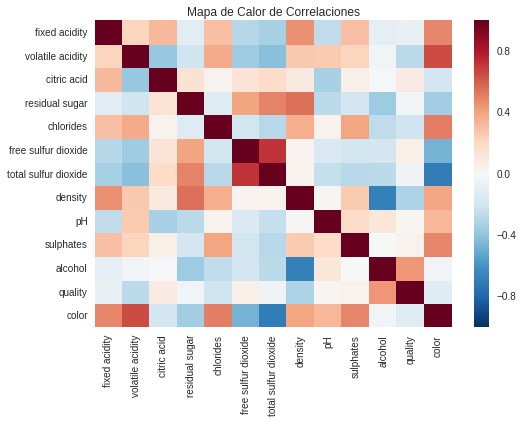

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
sns.plt.title("Mapa de Calor de Correlaciones")
sns.heatmap(dataset_scaled.corr())  

a priori, no observamos ninguna correlacion significativa entre las distintas variables. Todas parecen independientes entre si, por lo tanto, vamos a lanzar los modelos de clasificacion con __todas__ las columnas

## creamos los dataset train, validation y test

## investiguemos con graficos

In [11]:
from sklearn.model_selection import train_test_split

datos_spliteados = train_test_split(dataset_scaled,
                                    train_size=0.8, # 80% training
                                    test_size=0.2   # 20% testing
                                   )

In [12]:
test=datos_spliteados[1] #construimos el dataset test con el 20% de las observaciones

In [13]:
resto=datos_spliteados[0] #con el resto, construimos training y validacion

In [14]:
resto_split=train_test_split(resto,train_size=0.8,test_size=0.2) # lo troceamos de nuevo

In [15]:
training=resto_split[0] #tomamos el training

In [16]:
validation=resto_split[1] # finalmente, el test

In [17]:
training.count()

fixed acidity           4157
volatile acidity        4157
citric acid             4157
residual sugar          4157
chlorides               4157
free sulfur dioxide     4157
total sulfur dioxide    4157
density                 4157
pH                      4157
sulphates               4157
alcohol                 4157
quality                 4157
color                   4157
dtype: int64

In [18]:
validation.count()

fixed acidity           1040
volatile acidity        1040
citric acid             1040
residual sugar          1040
chlorides               1040
free sulfur dioxide     1040
total sulfur dioxide    1040
density                 1040
pH                      1040
sulphates               1040
alcohol                 1040
quality                 1040
color                   1040
dtype: int64

In [19]:
test.count()

fixed acidity           1300
volatile acidity        1300
citric acid             1300
residual sugar          1300
chlorides               1300
free sulfur dioxide     1300
total sulfur dioxide    1300
density                 1300
pH                      1300
sulphates               1300
alcohol                 1300
quality                 1300
color                   1300
dtype: int64

## lanzamos los modelos de clasificacion


In [20]:
#creo un dataset a partir del training con todas las columnas menos la columna color

In [21]:
from sklearn.ensemble import RandomForestClassifier

#preparo los dataset training ,validacion y test

training_rf = training
training_label_rf=training["color"]

validation_rf = validation
validation_label_rf=validation["color"]

test_rf=test
test_label_rf=test["color"]


#elimino la columna color y dejo preparados los datasets con todas las demas columnas para lanzar el modelo

del training_rf["color"]
del validation_rf["color"]
del test_rf["color"]

# lanzamos el RandomForestClassifier

rf = RandomForestClassifier(n_estimators=20, # 20 árboles
                            criterion="entropy", # Igual que en el DecisionTreeClassifier
                            max_depth=3, # Igual que en el DecisionTreeClassifier
                            min_samples_split=10,
                            min_samples_leaf=5,
                            bootstrap=True)

rf.fit(X=training_rf,y=training_label_rf) # lo entrenamos

print("Bien clasificados en validacion: %.16f" % rf.score(X=validation_rf,y=validation_label_rf))

Bien clasificados en validacion: 0.9865384615384616


obtenemos un magnífico resultado, probemos ahora con el dataset de Testing

In [22]:
rf.fit(X=test_rf,y=test_label_rf) # lo entrenamos

print("Bien clasificados en test: %.16f" % rf.score(X=test_rf,y=test_label_rf))

Bien clasificados en test: 0.9869230769230769


## Grid Search

vamos a lanzar una grid de RandomForests Classifiers a ver si encontramos una combinacion de parametros que nos de un resultado mejor

In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

tuned_parameters = [{
        "n_estimators":[6,8,20],
        "max_depth":[4,6,None],
        "min_samples_leaf":[1,2,3],
        "class_weight":["balanced",None]
    }]

Grid_rf = GridSearchCV(RandomForestClassifier(n_jobs=-1), tuned_parameters, cv=5)
Grid_rf.fit(X=training_rf,y=training_label_rf)
print("Best parameters :")
print(Grid_rf.best_params_)
print(classification_report(test_label_rf,rf.predict(test_rf)))

Best parameters :
{'class_weight': None, 'n_estimators': 20, 'max_depth': None, 'min_samples_leaf': 1}
             precision    recall  f1-score   support

          0       0.99      1.00      0.99       984
          1       0.99      0.96      0.97       316

avg / total       0.99      0.99      0.99      1300



## modelo regresor para la calidad del vino

In [24]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics  import mean_squared_error

#como vamos a predecir la variable "quality" lo hacemos a partir del dataset orginal, sin necesidad de normalizar las columnas

training_rf_reg = dataset # lanzamos el modelo regresor con el 100 % del dataset
training_label_rf_reg=dataset["quality"]

# lanzamos el RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=20, # 20 árboles
                            criterion="mse", # segun lo que viene en la doc
                            max_depth=3, # Igual que en el DecisionTreeClassifier
                            min_samples_split=10,
                            min_samples_leaf=5,
                            bootstrap=True)

rf_reg.fit(X=training_rf_reg,y=training_label_rf_reg) # lo entrenamos

# Medimos:
mse = mean_squared_error(y_true=training_label_rf_reg,
                         y_pred=rf_reg.predict(training_rf_reg))
rmse = np.sqrt(mse)
print("MSE: " + str(mse))
print("RMSE: " +  str(rmse))



MSE: 0.000750160658694
RMSE: 0.0273890609312
